✅ Kaggle API configured from uploaded kaggle.json.
✅ Dataset already present: /content/datasets/Pothole_Segmentation_YOLOv8
✅ Found YOLOv8 dataset at: /content/datasets/Pothole_Segmentation_YOLOv8
📄 Using data.yaml from: /content/datasets/Pothole_Segmentation_YOLOv8/data.yaml
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kob

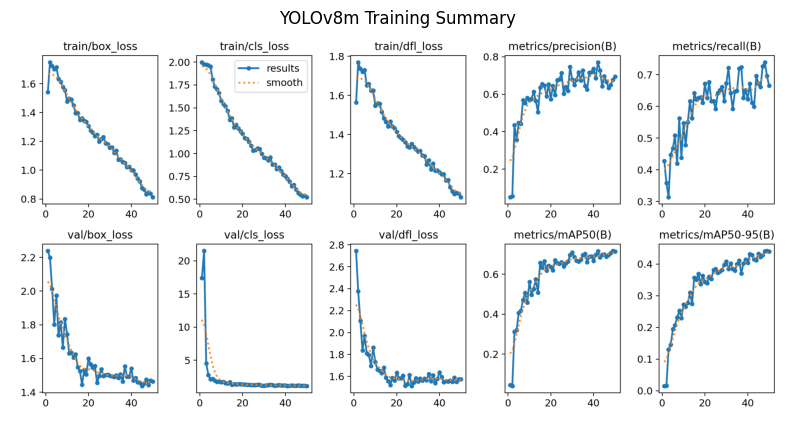

In [4]:
# ==============================================================
# MODEL 2 - YOLOv8m Detection for Potholes and Cracks
# ✅ Final Fixed Version (Kaggle + Existing YOLOv8 Dataset)
# ==============================================================

# === 1. INSTALL DEPENDENCIES ===
!pip install -q ultralytics kaggle opencv-python matplotlib tqdm seaborn

from ultralytics import YOLO
import os, json, yaml, zipfile, shutil
import matplotlib.pyplot as plt

# ==============================================================
# === 2. SETUP KAGGLE AUTH (Manual or Automatic) ===
# ==============================================================
os.makedirs("/root/.kaggle", exist_ok=True)

if os.path.exists("/root/.kaggle/kaggle.json"):
    os.chmod("/root/.kaggle/kaggle.json", 600)
    print("✅ Kaggle API configured from uploaded kaggle.json.")
else:
    print("⚙️ Manual setup mode — please enter your Kaggle credentials below.")
    KAGGLE_USERNAME ='manikandanvistas'
    KAGGLE_KEY ='7d5e147c041cfd67317ae1ec2a5e38fc'

    kaggle_json = {"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}
    with open("/root/.kaggle/kaggle.json", "w") as f:
        json.dump(kaggle_json, f)

    os.chmod("/root/.kaggle/kaggle.json", 600)
    print("✅ Kaggle API configured manually.")

# ==============================================================
# === 3. DOWNLOAD DATASET FROM KAGGLE ===
# ==============================================================
DATA_ROOT = "/content/datasets"
DATASET_DIR = f"{DATA_ROOT}/Pothole_Segmentation_YOLOv8"
os.makedirs(DATA_ROOT, exist_ok=True)

if not os.path.exists(DATASET_DIR):
    print("📦 Downloading YOLOv8 pothole dataset from Kaggle...")
    !kaggle datasets download -d farzadnekouei/pothole-image-segmentation-dataset -p {DATA_ROOT} --unzip -q
    print("✅ Dataset downloaded and extracted.")
else:
    print("✅ Dataset already present:", DATASET_DIR)

# ==============================================================
# === 4. SETUP YOLO-READY DATASET ===
# ==============================================================
yaml_path = os.path.join(DATASET_DIR, "data.yaml")

if not os.path.exists(DATASET_DIR):
    raise FileNotFoundError("❌ Dataset not found. Please ensure it exists under /content/datasets/")
else:
    print(f"✅ Found YOLOv8 dataset at: {DATASET_DIR}")

if not os.path.exists(yaml_path):
    raise FileNotFoundError("❌ data.yaml missing in dataset directory.")
else:
    print("📄 Using data.yaml from:", yaml_path)

# ==============================================================
# === 5. TRAIN YOLOv8m MODEL ===
# ==============================================================
model = YOLO("yolov8m.pt")

results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=8,
    project="/content/runs/detect",
    name="YOLOv8m_PotholeCrack_Final",
    exist_ok=True
)

# ==============================================================
# === 6. VALIDATE MODEL ===
# ==============================================================
metrics = model.val()
print("📊 Validation Metrics:")
print(metrics)

# ==============================================================
# === 7. PREDICT ON SAMPLE VIDEO OR IMAGES ===
# ==============================================================
sample_video = os.path.join(DATASET_DIR, "sample_video.mp4")
if os.path.exists(sample_video):
    print("🎥 Running prediction on sample_video.mp4...")
    model.predict(source=sample_video, save=True)
else:
    print("⚠️ No sample_video.mp4 found in dataset folder.")

sample_img_dir = os.path.join(DATASET_DIR, "valid", "images")
if os.path.exists(sample_img_dir):
    print("🖼️ Running prediction on sample validation images...")
    model.predict(source=sample_img_dir, save=True)
else:
    print("⚠️ No validation images found for testing.")

# ==============================================================
# === 8. VISUALIZE TRAINING RESULTS ===
# ==============================================================
train_dir = "/content/runs/detect/YOLOv8m_PotholeCrack_Final"
result_img = os.path.join(train_dir, "results.png")

if os.path.exists(result_img):
    print(f"📈 Training summary located at {result_img}")
    img = plt.imread(result_img)
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("YOLOv8m Training Summary")
    plt.show()
else:
    print("⚠️ Training results image not found.")


In [ ]:
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO("/content/runs/detect/YOLOv8m_PotholeCrack_Final/weights/best.pt")
metrics = model.val()
print("\n📊 YOLOv8 Validation Metrics Summary:")

# Mean precision, recall, mAP50, mAP50-95 across all classes
print(f"Precision (mean):   {metrics.box.mp:.4f}")
print(f"Recall (mean):      {metrics.box.mr:.4f}")
print(f"mAP@0.5:            {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:       {metrics.box.map:.4f}")
print(f"mAP@0.75:           {metrics.box.map75:.4f}")

# Class-wise (optional)
for i, c in enumerate(metrics.names):
    p, r, ap50, ap = metrics.box.class_result(i)
    print(f"Class {c}: P={p:.3f}, R={r:.3f}, AP@0.5={ap50:.3f}, AP@0.5:0.95={ap:.3f}")

# Inference speed
print("\n⚡ Speed per image (ms):")
for k, v in metrics.speed.items():
    print(f"  {k.capitalize()}: {v:.2f}")


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2076.5±713.6 MB/s, size: 93.1 KB)
val: Scanning /content/datasets/Pothole_Segmentation_YOLOv8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 127.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.5it/s 2.7s
                   all         60        201      0.675      0.697      0.717      0.442
Speed: 4.7ms preprocess, 22.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/detect/val4

📊 YOLOv8 Validation Metrics Summary:
Precision (mean):   0.6746
Recall (mean):      0.6965
mAP@0.5:            0.7174
mAP@0.5:0.95:       0.4416
mAP@0.75:           0.4905
Class 0: P=0.675, R=0.697, AP@0.5=0.717, AP@0.5:0.95=0.442

⚡ Speed per image (ms):
  Preprocess: 4.69
  Inference: 22.48
  Loss: 0.00
  Postprocess: 3.15
